# Sensitivity test - Different horizontal diffusion coefficients


### This script can be used to find area exceedance of a tracer at diffrent threshold values.

In [1]:
import xarray as xr
import tfv.xarray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FixedLocator


User inputs

In [2]:
#Read tuflowfv output files
file_path_Neap_base =  r"X:\Scratch1\aqua_dis_3hr_neap_001.nc"
file_path_Neap_SC01 =  r"X:\Scratch1\aqua_dis_sensitivity_hz_dif_0.004_neap_001.nc"
file_path_Neap_SC02 = r"X:\Scratch1\aqua_dis_sensitivity_hz_dif_0.029_neap_002.nc"
file_path_Neap_SC03 = r"X:\Scratch1\aqua_diff_002\RT_dis_sensitivity_hz_dif_0.745_neap_002.nc"
my_thresholds = [40]

Read in Files

In [3]:
# Open the datasets as arrays for both files
fv_Neap_base = xr.open_dataset(file_path_Neap_base, decode_times=False).tfv
fv_Neap_SC01 = xr.open_dataset(file_path_Neap_SC01, decode_times=False).tfv
fv_Neap_SC02 = xr.open_dataset(file_path_Neap_SC02, decode_times=False).tfv
fv_Neap_SC03 = xr.open_dataset(file_path_Neap_SC03, decode_times=False).tfv

Extract data

In [4]:
# Extract data at a certain depth range for both files
fv_2d_trace_Neap_base = fv_Neap_base.get_sheet('TRACE_1', datum='depth', limits=(0, 4))
fv_2d_trace_Neap_SC01 = fv_Neap_SC01.get_sheet('TRACE_1', datum='depth', limits=(0, 4))
fv_2d_trace_Neap_SC02 = fv_Neap_SC02.get_sheet('TRACE_1', datum='depth', limits=(0, 4))
fv_2d_trace_Neap_SC03 = fv_Neap_SC03.get_sheet('TRACE_1', datum='depth', limits=(0, 4))

...extracting sheet data: 100%|████████████████████████████████████████████████████| 1225/1225 [02:33<00:00,  7.99it/s]


In [6]:
# Specify start, end time, and final treatment time
Neap_Start_Time = pd.to_datetime('2022-10-13 00:00:00', format='%Y-%m-%d %H:%M:%S')
Neap_Final_Treatment = pd.to_datetime('2022-10-19 04:00:00', format='%Y-%m-%d %H:%M:%S')

Create data frames

In [7]:
# Create DataFrames for both files
df_Neap_base = pd.DataFrame(index=fv_Neap_base['Time'])
df_Neap_SC01 = pd.DataFrame(index=fv_Neap_SC01['Time'])
df_Neap_SC02 = pd.DataFrame(index=fv_Neap_SC02['Time'])
df_Neap_SC03 = pd.DataFrame(index=fv_Neap_SC03['Time'])

df_Neap_base.index = df_Neap_base.index.strftime('%d/%m/%Y %H:%M:%S')
df_Neap_SC01.index = df_Neap_SC01.index.strftime('%d/%m/%Y %H:%M:%S')
df_Neap_SC02.index = df_Neap_SC02.index.strftime('%d/%m/%Y %H:%M:%S')
df_Neap_SC03.index = df_Neap_SC03.index.strftime('%d/%m/%Y %H:%M:%S')

df_Neap_base.index = (pd.to_datetime(df_Neap_base.index, format='%d/%m/%Y %H:%M:%S') - Neap_Final_Treatment) / pd.Timedelta(hours=1)
df_Neap_SC01.index = (pd.to_datetime(df_Neap_SC01.index, format='%d/%m/%Y %H:%M:%S') - Neap_Final_Treatment) / pd.Timedelta(hours=1)
df_Neap_SC02.index = (pd.to_datetime(df_Neap_SC02.index, format='%d/%m/%Y %H:%M:%S') - Neap_Final_Treatment) / pd.Timedelta(hours=1)
df_Neap_SC03.index = (pd.to_datetime(df_Neap_SC03.index, format='%d/%m/%Y %H:%M:%S') - Neap_Final_Treatment) / pd.Timedelta(hours=1)


Calculate area exceedance

In [8]:
for tr in my_thresholds:
    
    ind = fv_2d_trace_Neap_base['TRACE_1'] > tr #This is nTimesteps X nCells
    area_filtered = fv_2d_trace_Neap_base['cell_A'].values[None,] * ind #That magical None will handle broadcasting so that the shapes match.Equivalent to doing ones (nTimesteps)X if you were in Matlab
    total_area = area_filtered.sum(dim='NumCells2D')
    total_area_km2 = total_area.values / 1000000 # Convert total area from m² to km²
    total_area_km2 = total_area_km2.reshape(-1, 1) # Reshape array to match index length
    df_Neap_base[f'Base case - Horizontal Diffusivity limits 0.004 to 0.355'] = total_area_km2 
   
    ind = fv_2d_trace_Neap_SC01['TRACE_1'] > tr #This is nTimesteps X nCells
    area_filtered = fv_2d_trace_Neap_SC01['cell_A'].values[None,] * ind #That magical None will handle broadcasting so that the shapes match.Equivalent to doing ones (nTimesteps)X if you were in Matlab
    total_area = area_filtered.sum(dim='NumCells2D')
    total_area_km2 = total_area.values / 1000000 # Convert total area from m² to km²
    total_area_km2 = total_area_km2.reshape(-1, 1) # Reshape array to match index length
    df_Neap_SC01[f'Horizontal Diffusivity 0.004'] = total_area_km2 
    
    ind = fv_2d_trace_Neap_SC02['TRACE_1'] > tr #This is nTimesteps X nCells
    area_filtered = fv_2d_trace_Neap_SC02['cell_A'].values[None,] * ind #That magical None will handle broadcasting so that the shapes match.Equivalent to doing ones (nTimesteps)X if you were in Matlab
    total_area = area_filtered.sum(dim='NumCells2D')
    total_area_km2 = total_area.values / 1000000 # Convert total area from m² to km²
    total_area_km2 = total_area_km2.reshape(-1, 1) # Reshape array to match index length
    df_Neap_SC02[f'Horizontal Diffusivity 0.029'] = total_area_km2 
    
    ind = fv_2d_trace_Neap_SC03['TRACE_1'] > tr #This is nTimesteps X nCells
    area_filtered = fv_2d_trace_Neap_SC03['cell_A'].values[None,] * ind #That magical None will handle broadcasting so that the shapes match.Equivalent to doing ones (nTimesteps)X if you were in Matlab
    total_area = area_filtered.sum(dim='NumCells2D')
    total_area_km2 = total_area.values / 1000000 # Convert total area from m² to km²
    total_area_km2 = total_area_km2.reshape(-1, 1) # Reshape array to match index length
    df_Neap_SC03[f'Horizontal Diffusivity 0.745'] = total_area_km2   

Plotting

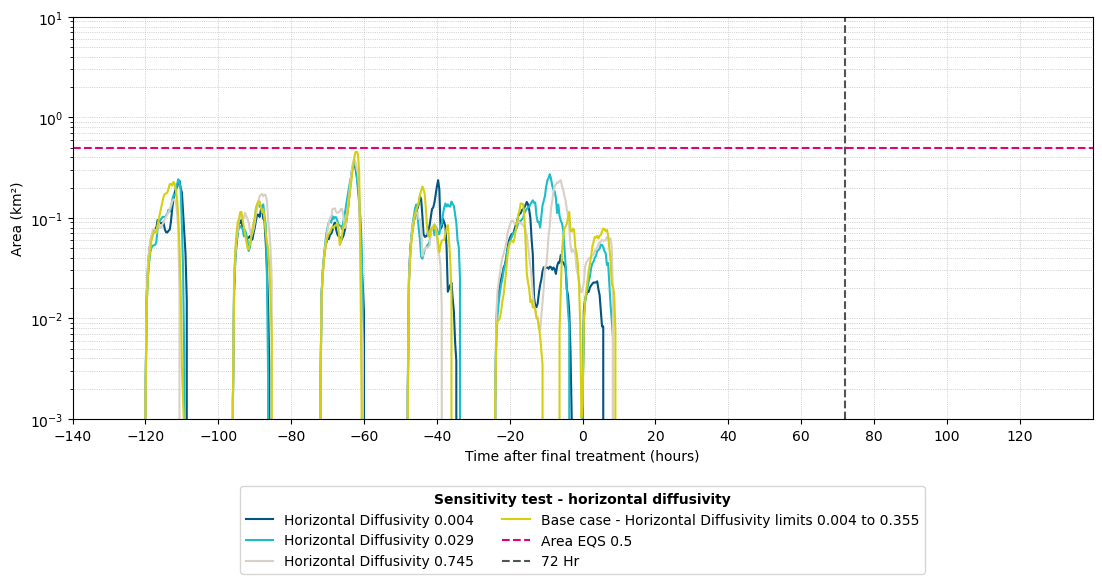

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.28)

# Plot the data for the first file
df_Neap_SC01.plot(ax=ax, logy=True, color='#005581', label='Horizontal Diffusivity 0.004')

# Plot the data for the second file
df_Neap_SC02.plot(ax=ax, logy=True, color='#1ABDC9', label='Horizontal Diffusivity 0.0299')

# Plot the data for the third file
df_Neap_SC03.plot(ax=ax, logy=True, color='#D8D0C7', label='Horizontal Diffusivity 0.745')

# Plot the data for the first file
df_Neap_base.plot(ax=ax, logy=True, color='#D4D00F', label='Base case - Horizontal Diffusivity limits 0.004 to 0.355')

ax.set_xlabel('Time after final treatment (hours)')
ax.set_ylabel('Area (km²)')
ax.set_ylim(0.001, 10)
ax.set_xlim(-140, 140)
ax.set_xticks(np.arange(-140, 140, 20))

#Add EQS lines
ax.hlines(y=0.5, xmin=-140, xmax=140, colors='#E20177', linestyles='dashed', label='Area EQS 0.5')
ax.vlines(x=72, ymin=0, ymax=10, colors='#4F5650', linestyles='dashed', label='72 Hr')

# Add legend
# legend = ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1, title='72 hr Area EQS')
# plt.setp(legend.get_title(), weight='bold')

# Update the legend
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, title='Sensitivity test - horizontal diffusivity')
plt.setp(legend.get_title(), weight='bold')

# Add minor gridlines for the logarithmic y-axis
ax.yaxis.grid(True, which='both', linestyle=':', linewidth=0.5)
ax.xaxis.grid(True, which='major', linestyle=':', linewidth=0.5)

plt.xticks(rotation=0)

# Save plot as PNG image with DPI of 300
fig.savefig('../figures/aqua_72hr_sensitivity_test_hz_diffusionv2.png', dpi=300)

plt.show()